In [1]:
import sys
sys.path.append("../")

import numpy as np
import pylab as plt
import matplotlib
import torch
from matplotlib import cm
import torch.optim as optim
import torch.nn.functional as F

from src.models import *
from src.utils import *

In [ ]:
net = Autoencoder_8().cuda()
optimizer = optim.Adam(net.parameters(), 
                       lr=0.000302909736315133, 
                       betas=(0.5268863322451123, 0.6711591429799673),
                       weight_decay=1.0094445180612116e-06
                      )

results = train(net=net,
                criterion=torch.nn.MSELoss(),
                optimizer=optimizer,
                fpath='../workspace/checkpoints',
                name='convae_8',
                max_epoch=16)

Files already downloaded and verified


loss: 0.01447291511528194:  31%|███▏      | 5/16 [07:53<17:26, 95.16s/it]

In [3]:
results

{'loss': array([0.02883449, 0.02002705, 0.017012  , 0.01544815])}

In [4]:
err_mat, searcher = checkAutoencoder(net, method=SearchNN)

Files already downloaded and verified
Files already downloaded and verified


Coding test images...: 100%|██████████| 10000/10000 [01:51<00:00, 89.97it/s]


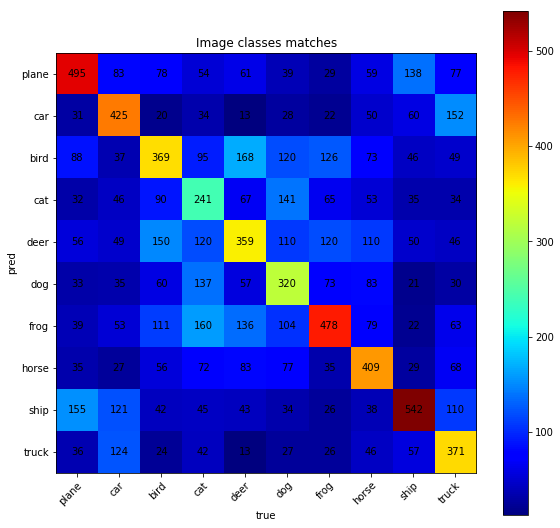

In [5]:
plotErrorMat(err_mat)

In [6]:
np.sum(err_mat.diagonal())

4009

In [14]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='datasets/', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='datasets/', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


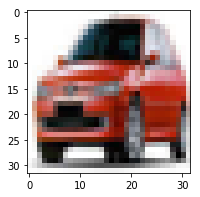

In [65]:
N = 231

plt.figure(figsize=(3,3))
plt.imshow(testset[N][0].permute(1,2,0).numpy())
plt.show()

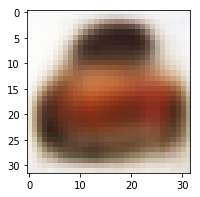

In [66]:
code = net.encoder(testset[N][0].reshape((1,3,32,32)).cuda())
img = net.decoder(code)
vec = code.flatten().cpu().detach().numpy()

plt.figure(figsize=(3,3))
plt.imshow(img[0].permute(1,2,0).cpu().detach().numpy())
plt.show()

In [67]:
from sklearn.neighbors import NearestNeighbors, KDTree

dtree = NearestNeighbors(n_neighbors=10).fit(searcher.data)
# dtree = KDTree(searcher.data)

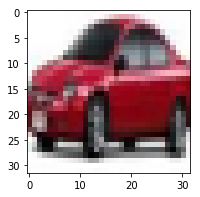

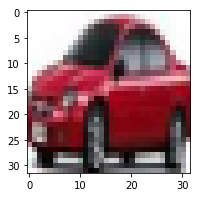

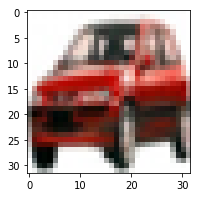

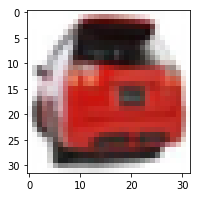

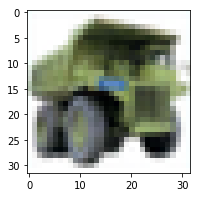

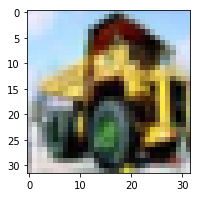

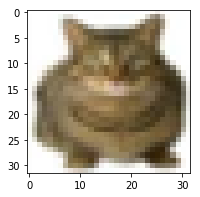

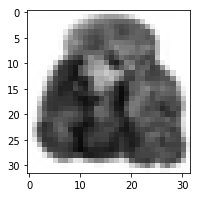

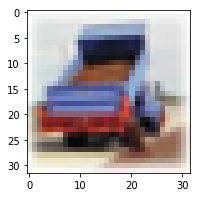

In [68]:
dist, ind = dtree.kneighbors([vec])
# dist, ind = dtree.query([vec], k=10)

for i in ind[0]:
    plt.figure(figsize=(3,3))
    plt.imshow(trainset[i][0].permute(1,2,0).numpy())
    plt.show()